In [4]:
import numpy as np
import pandas as pd

In [5]:
data_loc="../Data/properatti.csv"
data=pd.read_csv(data_loc)


In [6]:
# setear parámetros generales para los gráficos
import matplotlib.pyplot as plt
#plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize
plt.rc('figure', titlesize=19)  # fontsize of the figure title

<a id="section_toc"></a> 
## Tabla de Contenidos

[1-Nueva Categoria : RESIDENCIAL - COMERCIAL](#residencial-comercial)

[2-Nuevas Categorias a partir de : place_with_parent_names](#section_split_parents)

$\hspace{.5cm}$[2.1 place_with_parent_names: analisis exploratorio](#explor)
  
$\hspace{.5cm}$[2.2-place_with_parent_names: split](#split)
   
$\hspace{.5cm}$[2.3-df split: análisis exploratorio por columna](#split23)
   
$\hspace{.5cm}$[2.4-df split: separar y crear nuevas columnas](#split24)

$\hspace{.9cm}$[2.4.1-Nueva Columna:Provincia](#split241)

$\hspace{.9cm}$[2.4.2-Nueva Columna: Region](#split242)

$\hspace{.9cm}$[2.4.3-Nueva Columna: Barrios CABA](#split243)

$\hspace{.9cm}$[2.4.4-Nueva Columna: Ciudad](#split244)

$\hspace{.9cm}$[2.4.5-Reordeno el df split](#split245)

$\hspace{.9cm}$[2.4.6-Verifico las columnas del df split](#split246)

$\hspace{.5cm}$[2.5-Concateno el dataset "split" con el original "data" (properatti)](#split25)

[3-Analisis por Region y Provincia](#section3)



<a id="residencial-comercial"></a> 
### 1-NUEVA CATEGORIA "RESIDENCIAL - COMERCIAL"
A partir de la columna property_type, dividir los inmuebles en dos categorias, Residencial o Comercial

[volver a TOC](#section_toc)



In [7]:
#EVALUO COMO ESTA COMPUESTA LA CATEGORIA property_type
data["property_type"].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [8]:
#CREO UNA MASCARA PARA OBENTER LOS RESIDENCIALES
data_property_mask=(data["property_type"]=="apartment" )|  (data["property_type"]=="PH") | (data["property_type"]=="house")
data_property=data[data_property_mask]
data_property["property_type"].value_counts()


apartment    71065
house        40268
PH            5751
Name: property_type, dtype: int64

In [9]:
#REPLICO LA COLUMNA property_type (con la mascara de residencial) en la nueva columna residecial-comercial
data["residecial_comercial"]=data_property["property_type"]
#COMPRUEBO EL RESULTADO DE LA MASCARA CON LA DATA INICIAL
data["residecial_comercial"].value_counts()

apartment    71065
house        40268
PH            5751
Name: residecial_comercial, dtype: int64

In [10]:
#COMPRUEBO EL LISTADO DE COLUMNAS
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'residecial_comercial'],
      dtype='object')

In [11]:
#REEMPLAZO LOS VALORES EN DE LA COLUMNA RESIDENCIAL_COMERCIAL (data_property_mask)-  POR RESIDENCIAL

data["residecial_comercial"].replace("apartment", "residencial", inplace=True)
data["residecial_comercial"].replace("PH", "residencial", inplace=True)
data["residecial_comercial"].replace("house", "residencial", inplace=True)
#como habia replicado al columna sobre la mascara de resiencial, los valores que me quedaron vacios son los de store (me vuelve a dar 4136)
data["residecial_comercial"].replace(np.NaN,"comercial", inplace=True)

In [12]:
data["residecial_comercial"].value_counts()

residencial    117084
comercial        4136
Name: residecial_comercial, dtype: int64

In [13]:
data.pivot_table(values="price_per_m2", index=["property_type"], columns="residecial_comercial" ).round(0)

residecial_comercial,comercial,residencial
property_type,,
PH,NaN,3966.0
apartment,NaN,8654.0
house,NaN,3827.0
store,10806.0,NaN


<a id="#section_split_parents"></a> 

## 2- NUEVAS CATEGORIAS A PARTIR DE place_with_parent_names
Objetivo: separar la información para crear nuevas categorias

<a id="explor"></a> 
   ### 2.1-place_with_parent_names: analisis exploratorio"
[volver a TOC](#section_toc)


In [14]:

#cantidad de valores unicos
data.place_with_parent_names.unique().size

1164

In [15]:
data.place_with_parent_names.head(5)

0                |Argentina|Capital Federal|Mataderos|
1          |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2                |Argentina|Capital Federal|Mataderos|
3                  |Argentina|Capital Federal|Liniers|
4    |Argentina|Buenos Aires Costa Atlántica|Mar de...
Name: place_with_parent_names, dtype: object

<a id="split"></a> 
   ### 2.2-place_with_parent_names: split"

Separo los datos de la columna con la función str.split

[volver a TOC](#section_toc)

In [16]:
place_with_parent_split= data.place_with_parent_names.str.split(pat="|", expand=True)
place_with_parent_split

,0,1,2,3,4,5,6
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None
3,,Argentina,Capital Federal,Liniers,,None,None
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None
...,...,...,...,...,...,...,...
121215,,Argentina,Capital Federal,Belgrano,,None,None
121216,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,,None
121217,,Argentina,Capital Federal,Villa Urquiza,,None,None
121218,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,,None


Renombro las cabeceras de las columnas en función de lo que veo que contiene cada una

In [17]:
place_with_parent_split.rename(columns={1:"Pais", 2:"Zona_Provincia", 3:"Barrio_Ciudad",4:"Zona_Ciudad" ,5:"Barrio_Privado"}, inplace=True)
place_with_parent_split.head(5)

,0,Pais,Zona_Provincia,Barrio_Ciudad,Zona_Ciudad,Barrio_Privado,6
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None
3,,Argentina,Capital Federal,Liniers,,None,None
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None


<a id="split23"></a> 
   ### 2.3-split: análisis exploratorio por columna"

Análisis Exploratorio del contenido de cada columna
[volver a TOC](#section_toc)



In [18]:
#CONTROL DE CONTENIDO DE LAS COLUMNAS
place_with_parent_split.Pais.value_counts()

Argentina    121220
Name: Pais, dtype: int64

In [19]:
place_with_parent_split.Zona_Provincia.value_counts()
# Observación: hay que separar las provincias de las zonas

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [20]:
place_with_parent_split.Barrio_Ciudad.unique()
# Observación:hay que separar los que son de capital federal y pasarlos a barrio (en el resto esta el nombre de la ciudad)

array(['Mataderos', 'La Plata', 'Liniers', 'Mar del Plata',
       'Gualeguaychú', 'Vicente López', 'Belgrano', 'Rosario', 'Córdoba',
       'San Miguel', 'San Isidro', 'Palermo', 'Tigre', 'Villa Giardino',
       'General Rodríguez', 'Pilar', 'Morón', 'Flores', 'Boedo',
       'Malagueño', 'Las Cañitas', 'Villa Carlos Paz', 'Puerto Madero',
       'Balvanera', 'Escobar', 'Caballito', 'Nuñez', 'Berazategui',
       'General San Martín', 'Ituzaingó', 'Posadas', 'Tres de Febrero',
       'San Bernardo', 'San Telmo', 'Almagro', '', 'San Fernando',
       'Pinamar', 'Colón', 'Luján', 'San Lorenzo', 'La Matanza', 'Lanús',
       'Punilla', 'Villa Gesell', 'Lomas de Zamora', 'Salta', 'Santa Fe',
       'Colegiales', 'Exaltación de la Cruz', 'Floresta', 'Quilmes',
       'Reconquista', 'Confluencia', 'General Roca', 'Barrio Norte',
       'Emilia', 'Barracas', 'Villa Allende', 'Lobos',
       'San Martín de los Andes', 'Recoleta', 'Congreso', 'Villa Crespo',
       'Chacarita', 'Constitución'

In [21]:
place_with_parent_split.Zona_Ciudad.unique()
#Observación: estan mezclados hay un poco de todo, hay que filtrarlo por provincia y ciudad para ver que muestra

array(['', 'Centro', 'Munro', 'Martínez', 'Palermo Soho', 'Bella Vista',
       'Nordelta', 'Pilar', 'Castelar', 'Barrio San Gabriel',
       'Estancias del Pilar', 'Del Viso', 'San Isidro', 'Acassuso',
       'Fincas de Iraola', 'San Martín', 'Caseros', None,
       'Boulogne Sur Mer', 'Victoria', 'Benavidez', 'Beccar',
       'Lomas del Mirador', 'Lanús Este', 'Banfield', 'Jose Leon Suarez',
       'Olivos', 'El Talar', 'Quilmes', 'La Plata', 'Belén de Escobar',
       'Villa Maipu', 'San Andres', 'Villa Bosch', 'Sáenz Peña',
       'Empalme Lobos', 'Ramos Mejía', 'San Miguel',
       'Country Maschwitz Privado', 'Las Golondrinas',
       'Palermo Hollywood', 'Pontevedra',
       'Barrio Cerrado Fincas de Maschwitz', 'Haedo', 'Virreyes',
       'San Carlos de Bariloche', 'Villa Ballester', 'Lisandro Olmos',
       'Vicente López', 'La Perla', 'Tigre', 'San Justo', 'Palermo Chico',
       'Bernal', 'La Lonja', 'Jose Marmol', 'Martín Coronado', 'Tolosa',
       'Mapuche Country Club', 

In [22]:
place_with_parent_split.Barrio_Privado.unique()

array([None, '', 'Barrio El Golf', 'Barrio Las Glorietas',
       'Barrio Los Lagos', 'Enyoi', 'QBay Yacht', 'Barrio La Alameda',
       'Islas del Canal', 'Barrio Los Alisos', 'BarrioPortezuelo',
       'Barrio La Isla', 'Barrio Los Tilos', 'Barrio Los Sauces',
       'Barrio Cabos del Lago', 'Barrio Los Castores',
       'Barrio Barrancas del Lago', 'Barrio El Yacht'], dtype=object)

In [23]:
place_with_parent_split[6].value_counts()

    548
Name: 6, dtype: int64

<a id="split24"></a> 
   ### 2.4-split: separar y crear nuevas columnas"
Armo nuevas columnas a partir de la limpieza de la información generada con el split

[volver a TOC](#section_toc)


<a id="split241"></a> 
   ### 2.4.1-Provincia
[volver a TOC](#section_toc)


In [24]:
#duplico la infomraciond de Zona_Provincia en una nueva columna Provincia
place_with_parent_split["Provincia"]=place_with_parent_split["Zona_Provincia"]
#
lista_GBA=["Bs.As. G.B.A. Zona Sur","Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Oeste","Buenos Aires Costa Atlántica","Buenos Aires Interior" ]
place_with_parent_split["Provincia"].replace(lista_GBA,"Buenos Aires", inplace=True)
place_with_parent_split["Provincia"]

0         Capital Federal
1            Buenos Aires
2         Capital Federal
3         Capital Federal
4            Buenos Aires
               ...       
121215    Capital Federal
121216       Buenos Aires
121217    Capital Federal
121218       Buenos Aires
121219    Capital Federal
Name: Provincia, Length: 121220, dtype: object

In [25]:
#verifico como quedaron las provincias
place_with_parent_split.Provincia.value_counts()


Buenos Aires           61131
Capital Federal        32316
Córdoba                12069
Santa Fe               10172
Río Negro                808
Neuquén                  733
Mendoza                  681
Tucumán                  674
Corrientes               583
Misiones                 464
Entre Ríos               369
Salta                    278
Chubut                   259
San Luis                 252
La Pampa                 157
Formosa                   65
Chaco                     57
San Juan                  40
Tierra Del Fuego          31
Catamarca                 27
Jujuy                     26
Santa Cruz                20
Santiago Del Estero        4
La Rioja                   4
Name: Provincia, dtype: int64

<a id="split242"></a> 
   ### 2.4.2-Region
[volver a TOC](#section_toc)

In [26]:
#duplico la infomracion de Zona_Provincia en una nueva columna Region
place_with_parent_split["Region"]=place_with_parent_split["Zona_Provincia"]
place_with_parent_split["Region"].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [27]:
#Reemplazo todo lo que sea "Bs.As."
valores_viejos_BA=["Bs.As. G.B.A. Zona Sur","Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Oeste","Buenos Aires Costa Atlántica","Buenos Aires Interior" ]
valores_nuevos_BA=["G.B.A. Zona Sur","G.B.A. Zona Norte","G.B.A. Zona Oeste","B.A. Costa Atlántica","B.A. Interior" ]
mapping = dict(zip(valores_viejos_BA, valores_nuevos_BA))
place_with_parent_split["Region"]= place_with_parent_split["Region"].replace(mapping)
#place_with_parent_split.head(20)
mapping

{'Bs.As. G.B.A. Zona Sur': 'G.B.A. Zona Sur',
 'Bs.As. G.B.A. Zona Norte': 'G.B.A. Zona Norte',
 'Bs.As. G.B.A. Zona Oeste': 'G.B.A. Zona Oeste',
 'Buenos Aires Costa Atlántica': 'B.A. Costa Atlántica',
 'Buenos Aires Interior': 'B.A. Interior'}

In [28]:
#Reemplazo zona NEA"
valores_viejos_NEA=["Misiones","Corrientes","Formosa","Chaco" ]
valores_nuevos_NEA=["NEA", "NEA", "NEA", "NEA"]
mapping_NEA = dict(zip(valores_viejos_NEA, valores_nuevos_NEA))
place_with_parent_split["Region"]= place_with_parent_split["Region"].replace(mapping_NEA)
place_with_parent_split[place_with_parent_split["Region"]=="NEA"].head(10)


,0,Pais,Zona_Provincia,Barrio_Ciudad,Zona_Ciudad,Barrio_Privado,6,Provincia,Region
73,,Argentina,Misiones,Posadas,,None,None,Misiones,NEA
78,,Argentina,Misiones,Posadas,,None,None,Misiones,NEA
308,,Argentina,Misiones,Posadas,,None,None,Misiones,NEA
666,,Argentina,Corrientes,Paso de la Patria,,None,None,Corrientes,NEA
889,,Argentina,Misiones,Apóstoles,,None,None,Misiones,NEA
909,,Argentina,Misiones,Posadas,,None,None,Misiones,NEA
912,,Argentina,Misiones,Posadas,,None,None,Misiones,NEA
1059,,Argentina,Chaco,Resistencia,,None,None,Chaco,NEA
1771,,Argentina,Misiones,Oberá,,None,None,Misiones,NEA
1932,,Argentina,Misiones,Oberá,,None,None,Misiones,NEA


In [29]:
#Reemplazo zona NOA"
valores_viejos_NOA=["Jujuy","Salta","Tucumán","Catamarca","Santiago Del Estero"]
valores_nuevos_NOA=["NOA","NOA","NOA","NOA","NOA" ]
mapping_NOA = dict(zip(valores_viejos_NOA, valores_nuevos_NOA))
place_with_parent_split["Region"]= place_with_parent_split["Region"].replace(mapping_NOA)
place_with_parent_split[place_with_parent_split["Provincia"]=="Salta"].head(5)

,0,Pais,Zona_Provincia,Barrio_Ciudad,Zona_Ciudad,Barrio_Privado,6,Provincia,Region
133,,Argentina,Salta,Salta,,None,None,Salta,NOA
134,,Argentina,Salta,Salta,,None,None,Salta,NOA
445,,Argentina,Salta,Salta,,None,None,Salta,NOA
776,,Argentina,Salta,Salta,,None,None,Salta,NOA
956,,Argentina,Salta,Salta,,None,None,Salta,NOA


In [30]:
#Reemplazo zona CUYO"
valores_viejos_CUYO=["La Rioja","San Juan","Mendoza","San Luis" ]
valores_nuevos_CUYO=["CUYO","CUYO","CUYO","CUYO" ]
mapping_CUYO = dict(zip(valores_viejos_CUYO, valores_nuevos_CUYO))
place_with_parent_split["Region"]= place_with_parent_split["Region"].replace(mapping_CUYO)
place_with_parent_split[place_with_parent_split["Provincia"]=="Mendoza"].head(10)

,0,Pais,Zona_Provincia,Barrio_Ciudad,Zona_Ciudad,Barrio_Privado,6,Provincia,Region
406,,Argentina,Mendoza,Mendoza,,None,None,Mendoza,CUYO
407,,Argentina,Mendoza,Gobernador Benegas,,None,None,Mendoza,CUYO
451,,Argentina,Mendoza,Luján de Cuyo,,None,None,Mendoza,CUYO
1865,,Argentina,Mendoza,San Rafael,,None,None,Mendoza,CUYO
2459,,Argentina,Mendoza,Vistalba,,None,None,Mendoza,CUYO
2960,,Argentina,Mendoza,Godoy Cruz,,None,None,Mendoza,CUYO
2961,,Argentina,Mendoza,Godoy Cruz,,None,None,Mendoza,CUYO
2962,,Argentina,Mendoza,Godoy Cruz,,None,None,Mendoza,CUYO
2963,,Argentina,Mendoza,Godoy Cruz,,None,None,Mendoza,CUYO
2964,,Argentina,Mendoza,Godoy Cruz,,None,None,Mendoza,CUYO


In [31]:
#Reemplazo zona CENTRO"
valores_viejos_CENTRO=["Entre Ríos","Santa Fe", "Córdoba", "La Pampa" ]
valores_nuevos_CENTRO=["CENTRO","CENTRO","CENTRO","CENTRO"]
mapping_CENTRO = dict(zip(valores_viejos_CENTRO, valores_nuevos_CENTRO))
place_with_parent_split["Region"]= place_with_parent_split["Region"].replace(mapping_CENTRO)


In [32]:
#Reemplazo zona PATAGONIA"
valores_viejos_PATAGONIA=["Neuquén", "Río Negro", "Chubut","Santa Cruz", "Tierra Del Fuego" ]
valores_nuevos_PATAGONIA=["PATAGONIA","PATAGONIA","PATAGONIA","PATAGONIA","PATAGONIA"]
mapping_PATAGONIA= dict(zip(valores_viejos_PATAGONIA, valores_nuevos_PATAGONIA))
place_with_parent_split["Region"]= place_with_parent_split["Region"].replace(mapping_PATAGONIA)


In [33]:
#verifico como quedo 

split_grouped=place_with_parent_split.groupby("Region")
split_grouped["Provincia"].value_counts()


Region                Provincia          
B.A. Costa Atlántica  Buenos Aires           10006
B.A. Interior         Buenos Aires            2291
CENTRO                Córdoba                12069
                      Santa Fe               10172
                      Entre Ríos               369
                      La Pampa                 157
CUYO                  Mendoza                  681
                      San Luis                 252
                      San Juan                  40
                      La Rioja                   4
Capital Federal       Capital Federal        32316
G.B.A. Zona Norte     Buenos Aires           25560
G.B.A. Zona Oeste     Buenos Aires            9322
G.B.A. Zona Sur       Buenos Aires           13952
NEA                   Corrientes               583
                      Misiones                 464
                      Formosa                   65
                      Chaco                     57
NOA                   Tucumán           

 <a id="split243"></a> 
   ### 2.4.3-Barrios CABA
[volver a TOC](#section_toc)

 


In [34]:
#creo la columna de barrios para caba
place_with_parent_split["Barrios CABA"]=place_with_parent_split["Barrio_Ciudad"]
#filtro las provincias no caba
data_no_caba=place_with_parent_split[place_with_parent_split["Zona_Provincia"]!="Capital Federal"]
data_no_caba

,0,Pais,Zona_Provincia,Barrio_Ciudad,Zona_Ciudad,Barrio_Privado,6,Provincia,Region,Barrios CABA
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None,Buenos Aires,G.B.A. Zona Sur,La Plata
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None,Buenos Aires,B.A. Costa Atlántica,Mar del Plata
5,,Argentina,Entre Ríos,Gualeguaychú,,None,None,Entre Ríos,CENTRO,Gualeguaychú
6,,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,,None,Buenos Aires,G.B.A. Zona Norte,Vicente López
9,,Argentina,Santa Fe,Rosario,,None,None,Santa Fe,CENTRO,Rosario
...,...,...,...,...,...,...,...,...,...,...
121212,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Acassuso,,None,Buenos Aires,G.B.A. Zona Norte,San Isidro
121213,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Martínez,,None,Buenos Aires,G.B.A. Zona Norte,San Isidro
121214,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,,None,None,Buenos Aires,G.B.A. Zona Norte,San Isidro
121216,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,,None,Buenos Aires,G.B.A. Zona Norte,San Isidro


In [35]:
barrios_no_caba=place_with_parent_split[place_with_parent_split["Zona_Provincia"]!="Capital Federal"]["Barrios CABA"].unique()
barrios_no_caba_list=[barrios_no_caba]
type(barrios_no_caba_list)

list

In [36]:
#elimino de la columna Barrios CABA los registros que no pertenecen a Barrios de CABA
place_with_parent_split["Barrios CABA"].replace(barrios_no_caba_list, "", inplace=True)
place_with_parent_split

,0,Pais,Zona_Provincia,Barrio_Ciudad,Zona_Ciudad,Barrio_Privado,6,Provincia,Region,Barrios CABA
0,,Argentina,Capital Federal,Mataderos,,None,None,Capital Federal,Capital Federal,Mataderos
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None,Buenos Aires,G.B.A. Zona Sur,
2,,Argentina,Capital Federal,Mataderos,,None,None,Capital Federal,Capital Federal,Mataderos
3,,Argentina,Capital Federal,Liniers,,None,None,Capital Federal,Capital Federal,Liniers
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None,Buenos Aires,B.A. Costa Atlántica,
...,...,...,...,...,...,...,...,...,...,...
121215,,Argentina,Capital Federal,Belgrano,,None,None,Capital Federal,Capital Federal,Belgrano
121216,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,,None,Buenos Aires,G.B.A. Zona Norte,
121217,,Argentina,Capital Federal,Villa Urquiza,,None,None,Capital Federal,Capital Federal,
121218,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,,None,Buenos Aires,B.A. Costa Atlántica,


In [37]:
#verifico como quedó el listado de barrios CABA
Barrios_CABA_unique=place_with_parent_split[place_with_parent_split["Barrios CABA"].notna()]["Barrios CABA"].unique()
Barrios_CABA_unique
#falta Villa urquiza

array(['Mataderos', '', 'Liniers', 'Belgrano', 'Palermo', 'Flores',
       'Boedo', 'Las Cañitas', 'Puerto Madero', 'Balvanera', 'Caballito',
       'Nuñez', 'San Telmo', 'Almagro', 'Colegiales', 'Floresta',
       'Barrio Norte', 'Barracas', 'Recoleta', 'Congreso', 'Villa Crespo',
       'Chacarita', 'Constitución', 'Saavedra', 'Monserrat', 'Pompeya',
       'Parque Chas', 'Paternal', 'Agronomía', 'Villa Pueyrredón',
       'Coghlan', 'Parque Centenario', 'Villa Luro', 'Villa Devoto',
       'Boca', 'Parque Avellaneda', 'San Cristobal', 'Velez Sarsfield',
       'Abasto', 'Versalles', 'Villa del Parque', 'Monte Castro',
       'Retiro', 'Parque Patricios', 'San Nicolás', 'Villa Santa Rita',
       'Centro / Microcentro', 'Once', 'Tribunales', 'Parque Chacabuco',
       'Catalinas', 'Villa General Mitre', 'Villa Lugano',
       'Villa Ortuzar', 'Villa Soldati', 'Villa Real', 'Villa Riachuelo'],
      dtype=object)

In [38]:
place_with_parent_split

,0,Pais,Zona_Provincia,Barrio_Ciudad,Zona_Ciudad,Barrio_Privado,6,Provincia,Region,Barrios CABA
0,,Argentina,Capital Federal,Mataderos,,None,None,Capital Federal,Capital Federal,Mataderos
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None,Buenos Aires,G.B.A. Zona Sur,
2,,Argentina,Capital Federal,Mataderos,,None,None,Capital Federal,Capital Federal,Mataderos
3,,Argentina,Capital Federal,Liniers,,None,None,Capital Federal,Capital Federal,Liniers
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None,Buenos Aires,B.A. Costa Atlántica,
...,...,...,...,...,...,...,...,...,...,...
121215,,Argentina,Capital Federal,Belgrano,,None,None,Capital Federal,Capital Federal,Belgrano
121216,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,,None,Buenos Aires,G.B.A. Zona Norte,
121217,,Argentina,Capital Federal,Villa Urquiza,,None,None,Capital Federal,Capital Federal,
121218,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,,None,Buenos Aires,B.A. Costa Atlántica,


<a id="split244"></a> 
   ### 2.4.4-Ciudad
   De la columna Barrio Ciudad elimino la información de los barrios CABA para que quede la información de ciudades
[volver a TOC](#section_toc)



In [39]:
#elimino de la columna Barrio_Ciudad  los registros que pertenecen a Barrios de CABA y los reemplazo con el nombre de CABA
place_with_parent_split["Barrio_Ciudad"].replace(Barrios_CABA_unique, "Capital Federal", inplace=True)
place_with_parent_split[place_with_parent_split["Zona_Provincia"]=="Capital Federal"]["Barrio_Ciudad"].unique()

array(['Capital Federal', 'Villa Urquiza'], dtype=object)

In [40]:
#elimino de la columna Barrio_Ciudad  Villa Urquiza
place_with_parent_split["Barrio_Ciudad"].replace("Villa Urquiza", "Capital Federal", inplace=True)
place_with_parent_split[place_with_parent_split["Zona_Provincia"]=="Capital Federal"]["Barrio_Ciudad"].unique()


array(['Capital Federal'], dtype=object)

<a id="split245"></a> 
   ### 2.4.5-Reordeno el Dataset "split"
[volver a TOC](#section_toc)


In [41]:
#veo como quedó
place_with_parent_split

,0,Pais,Zona_Provincia,Barrio_Ciudad,Zona_Ciudad,Barrio_Privado,6,Provincia,Region,Barrios CABA
0,,Argentina,Capital Federal,Capital Federal,,None,None,Capital Federal,Capital Federal,Mataderos
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None,Buenos Aires,G.B.A. Zona Sur,
2,,Argentina,Capital Federal,Capital Federal,,None,None,Capital Federal,Capital Federal,Mataderos
3,,Argentina,Capital Federal,Capital Federal,,None,None,Capital Federal,Capital Federal,Liniers
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None,Buenos Aires,B.A. Costa Atlántica,
...,...,...,...,...,...,...,...,...,...,...
121215,,Argentina,Capital Federal,Capital Federal,,None,None,Capital Federal,Capital Federal,Belgrano
121216,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,,None,Buenos Aires,G.B.A. Zona Norte,
121217,,Argentina,Capital Federal,Capital Federal,,None,None,Capital Federal,Capital Federal,
121218,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,,None,Buenos Aires,B.A. Costa Atlántica,


In [42]:
#reemplazo el nombre de las columnas
place_with_parent_split.rename(columns={"Pais":"split_Pais"}, inplace=True)
place_with_parent_split.rename(columns={"Zona_Provincia":"split_Zona"}, inplace=True)
place_with_parent_split.rename(columns={"Barrio_Ciudad":"split_Ciudad"}, inplace=True)
place_with_parent_split.rename(columns={"Zona_Ciudad":"split_Otros_datos_Zona"}, inplace=True)
place_with_parent_split.rename(columns={"Provincia":"split_Provincia"}, inplace=True)
place_with_parent_split.rename(columns={"Region":"split_Region"}, inplace=True)
place_with_parent_split.rename(columns={"Barrios CABA":"split_Barrios_CABA"}, inplace=True)




In [43]:
#veo como quedó
place_with_parent_split.head(5)

,0,split_Pais,split_Zona,split_Ciudad,split_Otros_datos_Zona,Barrio_Privado,6,split_Provincia,split_Region,split_Barrios_CABA
0,,Argentina,Capital Federal,Capital Federal,,None,None,Capital Federal,Capital Federal,Mataderos
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None,Buenos Aires,G.B.A. Zona Sur,
2,,Argentina,Capital Federal,Capital Federal,,None,None,Capital Federal,Capital Federal,Mataderos
3,,Argentina,Capital Federal,Capital Federal,,None,None,Capital Federal,Capital Federal,Liniers
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None,Buenos Aires,B.A. Costa Atlántica,


In [44]:
#elimino las columnas que no me sirven 
place_with_parent_split.drop(columns=["Barrio_Privado"], inplace=True)
place_with_parent_split.drop(columns=[6], inplace=True)


In [45]:
#reordeno las columnas
place_with_parent_split=place_with_parent_split.reindex(columns=["split_Pais","split_Region", "split_Provincia","split_Zona", "split_Ciudad",  "split_Barrios_CABA","split_Otros_datos_Zona"])
place_with_parent_split.head(5)

,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona
0,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Mataderos,
1,Argentina,G.B.A. Zona Sur,Buenos Aires,Bs.As. G.B.A. Zona Sur,La Plata,,
2,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Mataderos,
3,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Liniers,
4,Argentina,B.A. Costa Atlántica,Buenos Aires,Buenos Aires Costa Atlántica,Mar del Plata,,Centro


 <a id="split246"></a> 
   ### 2.4.6-Verifico las columnas del Dataset "split"
[volver a TOC](#section_toc)

 
 Análisis exploratorio de las columnas ya depuradas a los fines del control

In [46]:
#verifico como quedaron armadas las columnas
place_with_parent_split["split_Provincia"].unique()
#ok

array(['Capital Federal', 'Buenos Aires', 'Entre Ríos', 'Santa Fe',
       'Córdoba', 'Misiones', 'Salta', 'Neuquén', 'Río Negro', 'San Luis',
       'Mendoza', 'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco',
       'San Juan', 'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [47]:
place_with_parent_split["split_Region"].unique()
#ok

array(['Capital Federal', 'G.B.A. Zona Sur', 'B.A. Costa Atlántica',
       'CENTRO', 'G.B.A. Zona Norte', 'G.B.A. Zona Oeste', 'NEA',
       'B.A. Interior', 'NOA', 'PATAGONIA', 'CUYO'], dtype=object)

In [48]:
place_with_parent_split["split_Barrios_CABA"].unique()
#ok

array(['Mataderos', '', 'Liniers', 'Belgrano', 'Palermo', 'Flores',
       'Boedo', 'Las Cañitas', 'Puerto Madero', 'Balvanera', 'Caballito',
       'Nuñez', 'San Telmo', 'Almagro', 'Colegiales', 'Floresta',
       'Barrio Norte', 'Barracas', 'Recoleta', 'Congreso', 'Villa Crespo',
       'Chacarita', 'Constitución', 'Saavedra', 'Monserrat', 'Pompeya',
       'Parque Chas', 'Paternal', 'Agronomía', 'Villa Pueyrredón',
       'Coghlan', 'Parque Centenario', 'Villa Luro', 'Villa Devoto',
       'Boca', 'Parque Avellaneda', 'San Cristobal', 'Velez Sarsfield',
       'Abasto', 'Versalles', 'Villa del Parque', 'Monte Castro',
       'Retiro', 'Parque Patricios', 'San Nicolás', 'Villa Santa Rita',
       'Centro / Microcentro', 'Once', 'Tribunales', 'Parque Chacabuco',
       'Catalinas', 'Villa General Mitre', 'Villa Lugano',
       'Villa Ortuzar', 'Villa Soldati', 'Villa Real', 'Villa Riachuelo'],
      dtype=object)

In [49]:
place_with_parent_split["split_Ciudad"].unique()
#pareciera que está ok, no tengo un listado de ciudades para controlarlo

array(['Capital Federal', 'La Plata', 'Mar del Plata', 'Gualeguaychú',
       'Vicente López', 'Rosario', 'Córdoba', 'San Miguel', 'San Isidro',
       'Tigre', 'Villa Giardino', 'General Rodríguez', 'Pilar', 'Morón',
       'Malagueño', 'Villa Carlos Paz', 'Escobar', 'Berazategui',
       'General San Martín', 'Ituzaingó', 'Posadas', 'Tres de Febrero',
       'San Bernardo', 'San Fernando', 'Pinamar', 'Colón', 'Luján',
       'San Lorenzo', 'La Matanza', 'Lanús', 'Punilla', 'Villa Gesell',
       'Lomas de Zamora', 'Salta', 'Santa Fe', 'Exaltación de la Cruz',
       'Quilmes', 'Reconquista', 'Confluencia', 'General Roca', 'Emilia',
       'Villa Allende', 'Lobos', 'San Martín de los Andes', 'Viedma',
       'Merlo', 'José C Paz', 'Santo Tomé', 'Bahía Blanca', 'Neuquén',
       'San Carlos de Bariloche', 'Mendoza', 'Gobernador Benegas',
       'Moreno', 'Almirante Brown', 'Luján de Cuyo', 'Mar del Tuyú',
       'Esperanza', 'Berisso', 'Malvinas Argentinas', 'Rivadavia',
       'Paso d

 <a id="split25"></a> 
   ### 2.5-Concateno el dataset "split" con el original "data" (properatti)
[volver a TOC](#section_toc)



In [50]:
place_with_parent_split

,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona
0,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Mataderos,
1,Argentina,G.B.A. Zona Sur,Buenos Aires,Bs.As. G.B.A. Zona Sur,La Plata,,
2,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Mataderos,
3,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Liniers,
4,Argentina,B.A. Costa Atlántica,Buenos Aires,Buenos Aires Costa Atlántica,Mar del Plata,,Centro
...,...,...,...,...,...,...,...
121215,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Belgrano,
121216,Argentina,G.B.A. Zona Norte,Buenos Aires,Bs.As. G.B.A. Zona Norte,San Isidro,,Beccar
121217,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,,
121218,Argentina,B.A. Costa Atlántica,Buenos Aires,Buenos Aires Costa Atlántica,Mar del Plata,,Plaza Colón


In [51]:
#tomo tres muestras antes de hacer el concat
place_with_parent_split.sample(3)

,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona
56135,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Abasto,
61709,Argentina,B.A. Costa Atlántica,Buenos Aires,Buenos Aires Costa Atlántica,Villa Gesell,,
19749,Argentina,B.A. Costa Atlántica,Buenos Aires,Buenos Aires Costa Atlántica,Villa Gesell,,


In [52]:
#chequeo esas fila en al df original
data.iloc[[25807,56304,36167]]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,residecial_comercial
25807,25807,sell,house,Paso del Rey,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|Pas...,Argentina,Bs.As. G.B.A. Zona Oeste,3430102.0,"-34.6312117817,-58.7381574772",-34.631212,...,194.444444,760.869565,NaN,3.0,NaN,http://www.properati.com.ar/17qf4_venta_casa_m...,Casa a la venta a pasos de Colectora Oeste nor...,"Casa en Venta en Paso del Rey, Sobre Colectora...",https://thumbs4.properati.com/6/w-K5dc-WxdA4gq...,residencial
56304,56304,sell,PH,Ciudadela,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,Bs.As. G.B.A. Zona Oeste,3435376.0,"-34.6418642,-58.5462544",-34.641864,...,1351.351351,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19ql6_venta_ph_ciu...,Venta de Departamento 2 AMBIENTES en Ciudadela...,PH EN VENTA,https://thumbs4.properati.com/7/N3SYEMxyka2n0G...,residencial
36167,36167,sell,apartment,Centro / Microcentro,|Argentina|Capital Federal|Centro / Microcentro|,Argentina,Capital Federal,3435548.0,"-34.5987652,-58.3761087",-34.598765,...,2000.000000,NaN,7.0,NaN,1700.0,http://www.properati.com.ar/18g7f_venta_depart...,VENTA DEPARTAMENTO 3 AMBIENTES MICROCENTROUnid...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/4/vPxmqUoCqLYTyp...,residencial


In [53]:
data=pd.concat([data,place_with_parent_split], axis=1, join="outer", copy="True" )

In [54]:
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,title,image_thumbnail,residecial_comercial,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,residencial,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Mataderos,
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,residencial,Argentina,G.B.A. Zona Sur,Buenos Aires,Bs.As. G.B.A. Zona Sur,La Plata,,
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,residencial,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Mataderos,
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,residencial,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Liniers,
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,residencial,Argentina,B.A. Costa Atlántica,Buenos Aires,Buenos Aires Costa Atlántica,Mar del Plata,,Centro


In [55]:
#reviso los indices de las 3 muestras que habia tomado
data.iloc[[25807,56304,36167]]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,title,image_thumbnail,residecial_comercial,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona
25807,25807,sell,house,Paso del Rey,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|Pas...,Argentina,Bs.As. G.B.A. Zona Oeste,3430102.0,"-34.6312117817,-58.7381574772",-34.631212,...,"Casa en Venta en Paso del Rey, Sobre Colectora...",https://thumbs4.properati.com/6/w-K5dc-WxdA4gq...,residencial,Argentina,G.B.A. Zona Oeste,Buenos Aires,Bs.As. G.B.A. Zona Oeste,Moreno,,Paso del Rey
56304,56304,sell,PH,Ciudadela,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,Bs.As. G.B.A. Zona Oeste,3435376.0,"-34.6418642,-58.5462544",-34.641864,...,PH EN VENTA,https://thumbs4.properati.com/7/N3SYEMxyka2n0G...,residencial,Argentina,G.B.A. Zona Oeste,Buenos Aires,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,,Ciudadela
36167,36167,sell,apartment,Centro / Microcentro,|Argentina|Capital Federal|Centro / Microcentro|,Argentina,Capital Federal,3435548.0,"-34.5987652,-58.3761087",-34.598765,...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/4/vPxmqUoCqLYTyp...,residencial,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Centro / Microcentro,


In [56]:
place_with_parent_split.shape

(121220, 7)

 <a id="section3"></a> 
   ### 3-Analisis por Region y Provincia
Sobre el nuevo data set analizo los datos por Region y Provincia

[volver a TOC](#section_toc)


In [57]:
data.split_Provincia.value_counts()

Buenos Aires           61131
Capital Federal        32316
Córdoba                12069
Santa Fe               10172
Río Negro                808
Neuquén                  733
Mendoza                  681
Tucumán                  674
Corrientes               583
Misiones                 464
Entre Ríos               369
Salta                    278
Chubut                   259
San Luis                 252
La Pampa                 157
Formosa                   65
Chaco                     57
San Juan                  40
Tierra Del Fuego          31
Catamarca                 27
Jujuy                     26
Santa Cruz                20
Santiago Del Estero        4
La Rioja                   4
Name: split_Provincia, dtype: int64

<AxesSubplot:title={'center':'Cantidad de Publicaciones por Region'}, xlabel='Region', ylabel='Cantidad Publicaciones'>

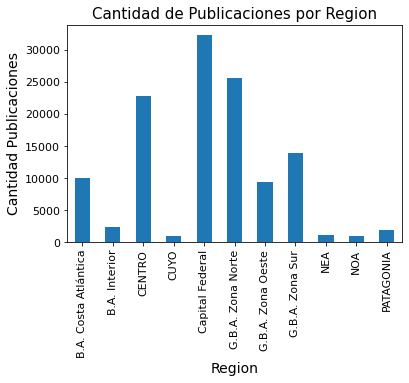

In [58]:
data.groupby("split_Region")["split_Provincia"].count().plot(kind="bar", title="Cantidad de Publicaciones por Region", xlabel="Region", ylabel="Cantidad Publicaciones")

En el gráfico se puede observar claramente la preminencia de las publicacioens pertenecientes a Buenos Aires (en todas sus zonas, salvo B.A Interior), Region Centro y Capital Federal. El resto de las zonas tiene una participación muchísimo menor

In [59]:
data.split_Region.value_counts()

Capital Federal         32316
G.B.A. Zona Norte       25560
CENTRO                  22767
G.B.A. Zona Sur         13952
B.A. Costa Atlántica    10006
G.B.A. Zona Oeste        9322
B.A. Interior            2291
PATAGONIA                1851
NEA                      1169
NOA                      1009
CUYO                      977
Name: split_Region, dtype: int64

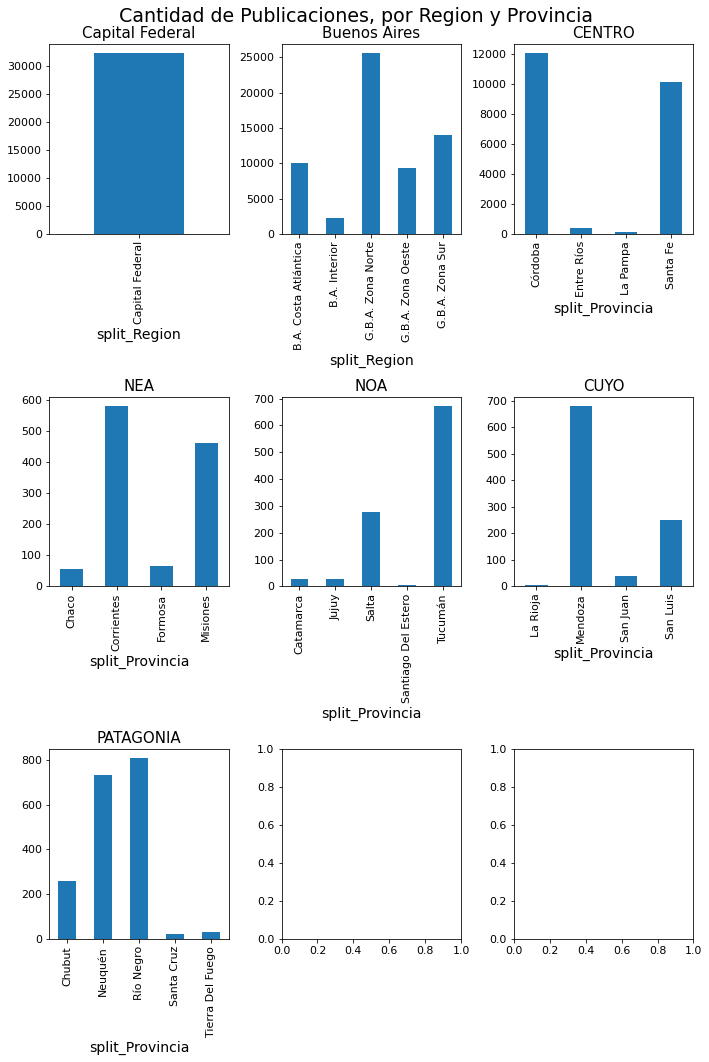

In [60]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize=(10,15))

#data[data["split_Region"]=="Capital Federal"].groupby("split_Provincia")["split_Provincia"].count().plot(kind="bar", ax=ax1)
#ax1.set_title("Capital Federal")
#data[data["Provincia"]=="Buenos Aires"].groupby("split_Region")["split_Region"].count().plot(kind="bar", ax=ax2)
#ax2.set_title("Buenos Aires")
data[data["split_Provincia"]=="Capital Federal"].groupby("split_Region")["split_Region"].count().plot(kind="bar",ax=ax1)
ax1.set_title("Capital Federal")
data[data["split_Provincia"]=="Buenos Aires"].groupby("split_Region")["split_Region"].count().plot(kind="bar",ax=ax2)
ax2.set_title("Buenos Aires")
data[data["split_Region"]=="CENTRO"].groupby("split_Provincia")["split_Provincia"].count().plot(kind="bar", ax=ax3)
ax3.set_title("CENTRO")
data[data["split_Region"]=="NEA"].groupby("split_Provincia")["split_Provincia"].count().plot(kind="bar", ax=ax4)
ax4.set_title("NEA")
data[data["split_Region"]=="NOA"].groupby("split_Provincia")["split_Provincia"].count().plot(kind="bar", ax=ax5)
ax5.set_title("NOA")
data[data["split_Region"]=="CUYO"].groupby("split_Provincia")["split_Provincia"].count().plot(kind="bar", ax=ax6)
ax6.set_title("CUYO")
data[data["split_Region"]=="PATAGONIA"].groupby("split_Provincia")["split_Provincia"].count().plot(kind="bar", ax=ax7)
ax7.set_title("PATAGONIA")
plt.suptitle("Cantidad de Publicaciones, por Region y Provincia")

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()

A los fines de mejorar la visibilidad de cada region, se grafica cada una por separado con sus propios ejes.
Se evidencia rápidamente las provincias con pocas publicaciones, todas ellas con menos de 100 publicaciones

* Formosa                   65

* Chaco                     57

* San Juan                  40

* Tierra Del Fuego          31

* Catamarca                 27

* Jujuy                     26

* Santa Cruz                20

* Santiago Del Estero        4

* La Rioja                   4
